## Import Data

In [1]:
import os
dataset_path = "Matang"
file_list = os.listdir(dataset_path)
print(file_list)

['17. l', '16. m', '3. t', '7. g', '15. n', '4. p', '13. ng', '11. r', '1. k', '5. y', '2. c', '6. w', '12. s', '8. j', '9. d', '18. h', '14. ny', '10. b']


## Data Visualization

### Organize Data and Labels

In [2]:
from PIL import Image
import numpy as np

image_data = []
labels = []
class_names = os.listdir(dataset_path)

for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            image = Image.open(image_path).convert('RGB')  # Open the image and convert to RGB
            image = image.resize((64, 64))  # Resize the image for uniformity
            image_data.append(np.array(image))  # Append the image data as numpy array
            labels.append(class_name)  # Append the label (folder name)
            
# Convert to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

print(f"Loaded {len(image_data)} images with labels.")

Loaded 2160 images with labels.


### Visualize Distribution

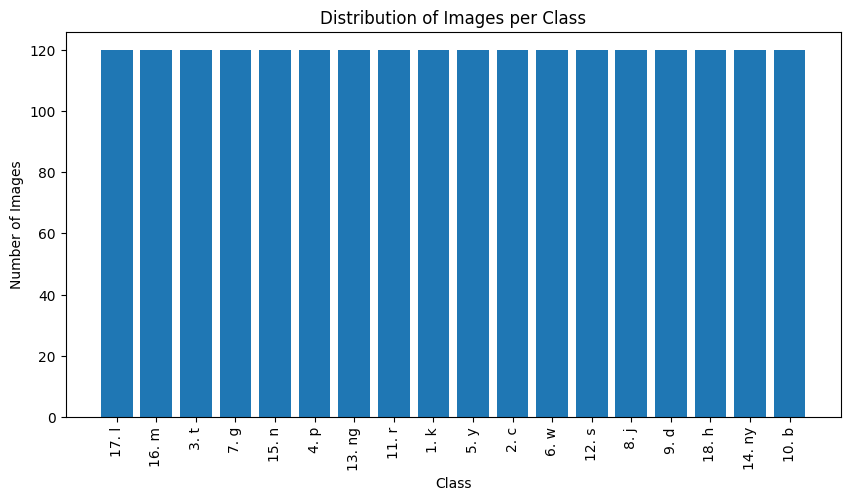

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the number of images per class
class_counts = Counter(labels)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)  # Rotate class labels for readability
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Class")
plt.show()

### Visualize Image Samples

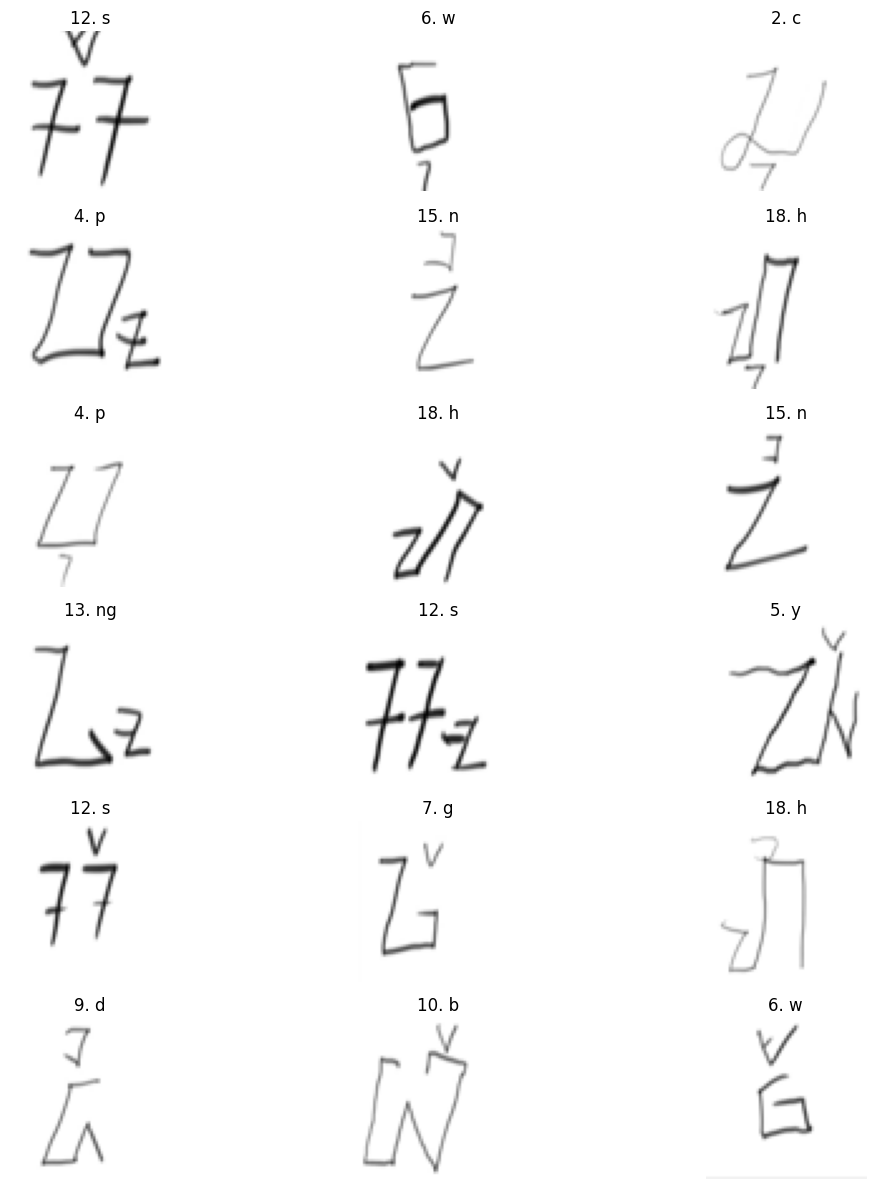

In [4]:
import random
def display_samples(image_data, labels, num_samples=18):
    plt.figure(figsize=(12, 12))
    rows, cols = 6, 3  # Set the grid to 6 rows and 3 columns
    
    for i in range(num_samples):
        index = random.randint(0, len(image_data) - 1)  # Randomly pick an image index
        plt.subplot(rows, cols, i + 1)  # Create a subplot grid
        plt.imshow(image_data[index])  # Display the image
        plt.title(labels[index])  # Display the label
        plt.axis('off')  # Hide the axes
    
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Display 18 random samples in a 6x3 grid
display_samples(image_data, labels, num_samples=18)

## Preprocessing

### Create a seperate sharpened Dataframe

In [5]:
from PIL import ImageFilter

def sharpen_images(image_data):
    sharpened_images = []
    for img in image_data:
        pil_img = Image.fromarray(img)  # Convert numpy array back to PIL image
        sharpened_img = pil_img.filter(ImageFilter.SHARPEN)  # Apply sharpening filter
        sharpened_images.append(np.array(sharpened_img))  # Convert back to numpy array
    return np.array(sharpened_images)

# Create the sharpened dataset
sharpened_image_data = sharpen_images(image_data)

# Check the number of sharpened images
print(f"Created {len(sharpened_image_data)} sharpened images.")

Created 2160 sharpened images.


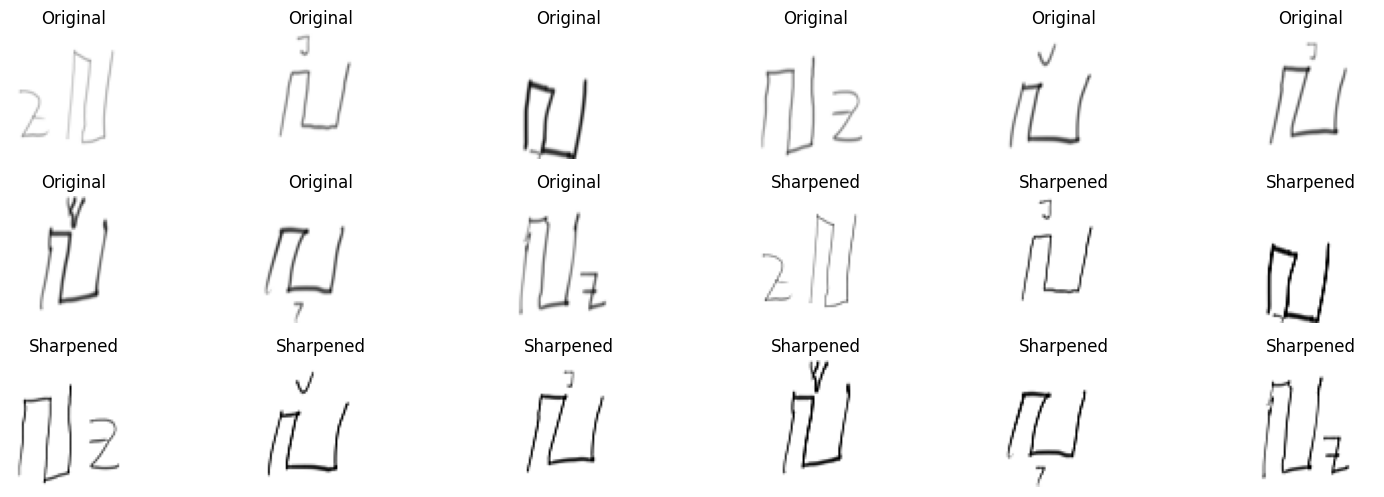

In [6]:
def compare_images(original_images, sharpened_images, num_samples=18):
    plt.figure(figsize=(15, 10))
    rows, cols = 6, 6  # 6 rows and 6 columns for comparison (3 original + 3 sharpened)
    
    for i in range(num_samples // 2):  # Half for original, half for sharpened
        # Original images
        plt.subplot(rows, cols, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis('off')

        # Sharpened images
        plt.subplot(rows, cols, i + 1 + (num_samples // 2))
        plt.imshow(sharpened_images[i])
        plt.title("Sharpened")
        plt.axis('off')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Compare the first 18 original and sharpened images
compare_images(image_data, sharpened_image_data, num_samples=18)

## Modelling

### Create a Sequential Model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
def create_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))  # Output layer

    return model

# Define input shape and number of classes
input_shape = (64, 64, 3)  # Change this if you resized your images differently
num_classes = len(set(labels))  # Assuming labels are already defined

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

# Print the model summary
model.summary()

/Users/anya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/anya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,522 (2.62 MB)

 Trainable params: 685,522 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

### Split the Datasets

In [8]:
from sklearn.model_selection import train_test_split

# Define a function to split datasets
def split_dataset(image_data, labels, train_size=0.8, val_size=0.1):
    # Split the dataset into training and temp (validation + test)
    X_train, X_temp, y_train, y_temp = train_test_split(image_data, labels, train_size=train_size, stratify=labels, random_state=42)

    # Calculate the size for validation set from the remaining data
    val_size_adjusted = val_size / (1 - train_size)  # Adjusted for the remaining data
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size_adjusted, stratify=y_temp, random_state=42)

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

# Split both datasets
(original_train, original_labels_train), (original_val, original_labels_val), (original_test, original_labels_test) = split_dataset(image_data, labels)
(sharpened_train, sharpened_labels_train), (sharpened_val, sharpened_labels_val), (sharpened_test, sharpened_labels_test) = split_dataset(sharpened_image_data, labels)

# Check the sizes of the splits
print(f"Original Train: {len(original_train)}, Validation: {len(original_val)}, Test: {len(original_test)}")
print(f"Sharpened Train: {len(sharpened_train)}, Validation: {len(sharpened_val)}, Test: {len(sharpened_test)}")

Original Train: 1728, Validation: 215, Test: 217
Sharpened Train: 1728, Validation: 215, Test: 217


### Convert labels into Numeric

In [9]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Now split the datasets using the encoded labels
(original_train, original_labels_train), (original_val, original_labels_val), (original_test, original_labels_test) = split_dataset(image_data, labels_encoded)
(sharpened_train, sharpened_labels_train), (sharpened_val, sharpened_labels_val), (sharpened_test, sharpened_labels_test) = split_dataset(sharpened_image_data, labels_encoded)

In [10]:
# Check the types
print(f"Type of original_labels_train: {type(original_labels_train)}")
print(f"Type of sharpened_labels_train: {type(sharpened_labels_train)}")

# Convert to numpy arrays with the appropriate dtype
original_labels_train = np.array(original_labels_train, dtype=np.int32)
original_labels_val = np.array(original_labels_val, dtype=np.int32)
original_labels_test = np.array(original_labels_test, dtype=np.int32)

sharpened_labels_train = np.array(sharpened_labels_train, dtype=np.int32)
sharpened_labels_val = np.array(sharpened_labels_val, dtype=np.int32)
sharpened_labels_test = np.array(sharpened_labels_test, dtype=np.int32)

Type of original_labels_train: <class 'numpy.ndarray'>
Type of sharpened_labels_train: <class 'numpy.ndarray'>


## Training

### Training with Original Datasets

In [11]:
# Define training parameters
epochs = 20  # You can adjust this based on your needs
batch_size = 32  # You can adjust this as well

# Train the model on the original dataset
history = model.fit(
    original_train,
    original_labels_train,
    validation_data=(original_val, original_labels_val),
    epochs=epochs,
    batch_size=batch_size
)

# Print training history
print("Training complete!")

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0575 - loss: 15.7706 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0508 - loss: 2.8906 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0518 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0458 - loss: 2.8904 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0572 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0481 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.0467 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0536 - loss: 2.8904 - val_accuracy: 0.0558 - 

### Training with Sharpened Datasets

In [12]:
# Train the model on the sharpened dataset
history_sharpened = model.fit(
    sharpened_train,
    sharpened_labels_train,
    validation_data=(sharpened_val, sharpened_labels_val),
    epochs=epochs,
    batch_size=batch_size
)

# Print training history for the sharpened dataset
print("Training on sharpened dataset complete!")

Epoch 1/20


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0619 - loss: 2.8904 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0463 - loss: 2.9122 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0580 - loss: 2.8904 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.0544 - loss: 2.8950 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0455 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0553 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0611 - loss: 2.9149 - val_accuracy: 0.0558 - val_loss: 2.8904
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0538 - loss: 2.8905 - val_accuracy: 0.0558 - val_loss: 2.

## Visualize Results


### Accuracy and Loss

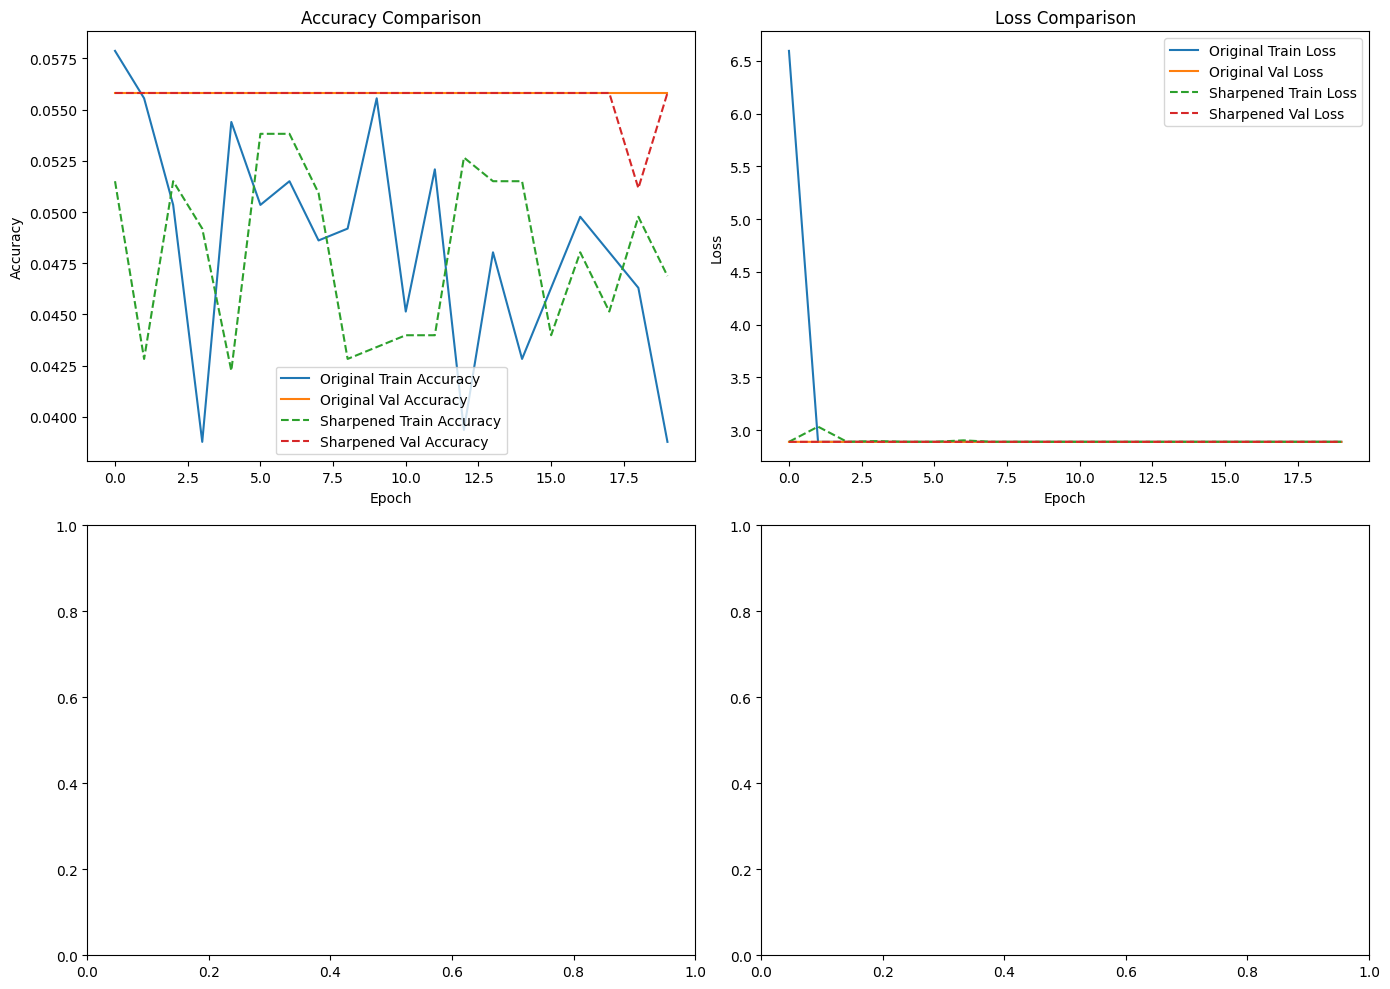

In [18]:
import matplotlib.pyplot as plt

def plot_comparison(history_original, history_sharpened):
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plotting accuracy
    axs[0, 0].plot(history_original.history['accuracy'], label='Original Train Accuracy')
    axs[0, 0].plot(history_original.history['val_accuracy'], label='Original Val Accuracy')
    axs[0, 0].plot(history_sharpened.history['accuracy'], label='Sharpened Train Accuracy', linestyle='--')
    axs[0, 0].plot(history_sharpened.history['val_accuracy'], label='Sharpened Val Accuracy', linestyle='--')
    axs[0, 0].set_title('Accuracy Comparison')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].legend()
    
    # Plotting loss
    axs[0, 1].plot(history_original.history['loss'], label='Original Train Loss')
    axs[0, 1].plot(history_original.history['val_loss'], label='Original Val Loss')
    axs[0, 1].plot(history_sharpened.history['loss'], label='Sharpened Train Loss', linestyle='--')
    axs[0, 1].plot(history_sharpened.history['val_loss'], label='Sharpened Val Loss', linestyle='--')
    axs[0, 1].set_title('Loss Comparison')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].legend()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Call the function to plot comparisons
plot_comparison(history, history_sharpened)

### Confusion Matrix

In [15]:
# Make predictions on the test set
predictions = model.predict(original_test)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(original_labels_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  

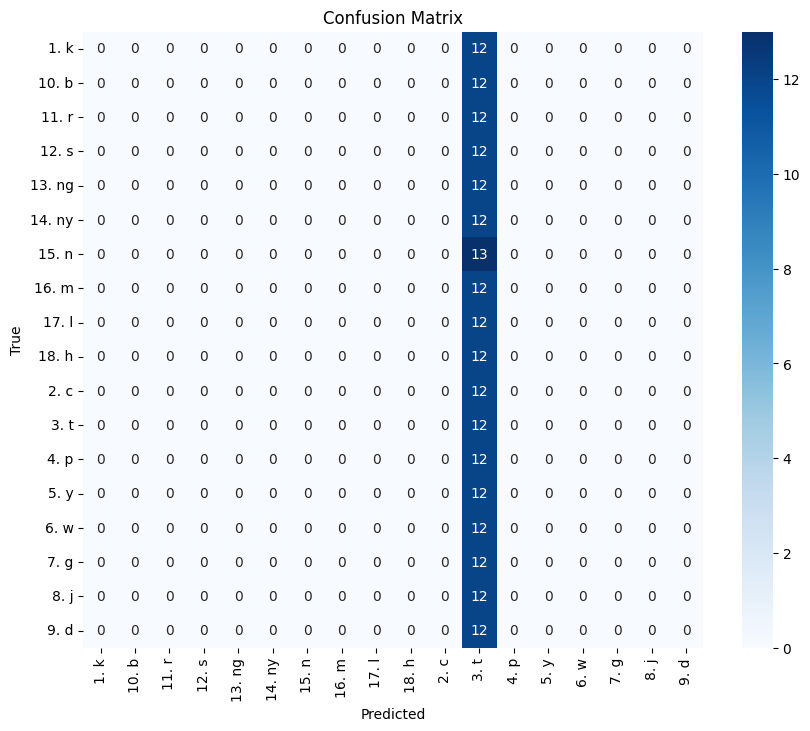

In [17]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, label_encoder.classes_)